# Grouping  private vs public universities with K means clustering

Using K means clustering to see if we can successfuly group universities, in a way which corresponds to their private vs public status, based on 18 variables in the _College_ dataset (obtained from the _Introduction to Statistical Learning_ book website).

URL: http://www-bcf.usc.edu/~gareth/ISL/data.html

The variables in the dataset are

* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

We will dump the _Private_ variable whilst we build model but subseqently use it to see how the model has done.

## 1) Import libraries

In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2) Get the data

In [15]:
!subl College

In [52]:
df = pd.read_csv('College', index_col=0)

## 3) Exploratory data analysis

### See what dataframe looks like

In [53]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Look at datatypes

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


Fom the above, we see:
- All ints except _S.F.Ratio_ (float64) and _Private_ (object) - which we are going to drop for the clustering model 
- No NaNs
- No missing data

### Look at some summary data

In [55]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [56]:
df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

It seems likely that Room Board might be higher for private universities.  How do these two factors relate to the overall graduation rate?

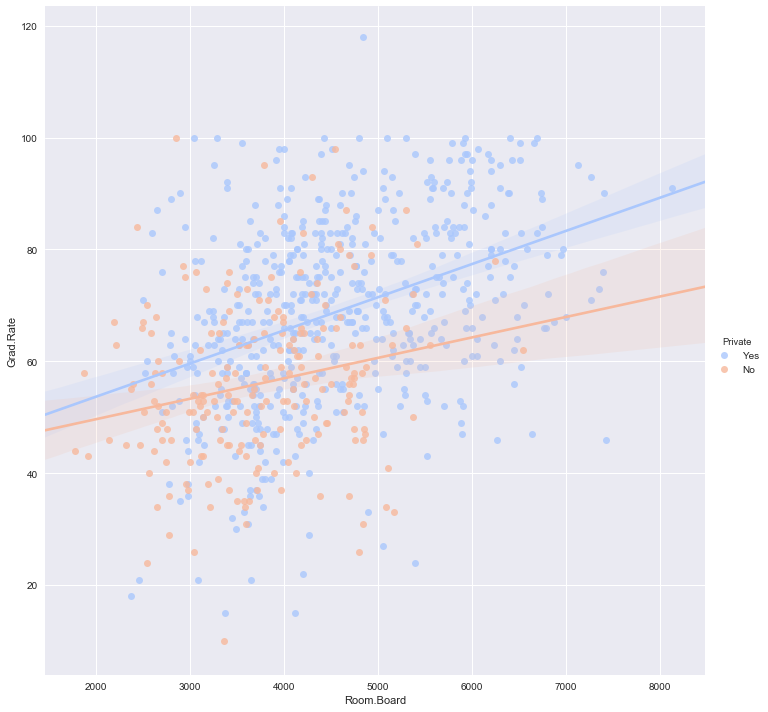

In [57]:
sns.lmplot(data=df, y='Grad.Rate', x='Room.Board', hue='Private', 
           fit_reg=True, palette='coolwarm', size=10, aspect=1)

There is no striking observation here.<br>
Graduation rate generally seems positively correlated with Room Board for both classes.<br>
It seems that the graduation rate might be slightly higher at private unversities.<br>
To a limited extent, graduation rate may be more positively correlated with room board for private universities than for public.
There is a lot of variation in the data. Given likely low r-values for these lines, it would be unwise to overinterpret.

Is there any relationship between the extent to which students will cross states for a university and the number of undergraduates at a university?  It seems likely that larger universities may  have more cross-statepulling power and may (but not necessarily) carry more kudos.  Larger universities are more likely to be able to offer specialist topics which may not be avialble within a student's home state.

So we might expect to see larger student attendance (which F.Undergrad is probably a good surrogate for) to correlate to greater numbers of out of state students. Let's plot Outstate against F.Undergrad...

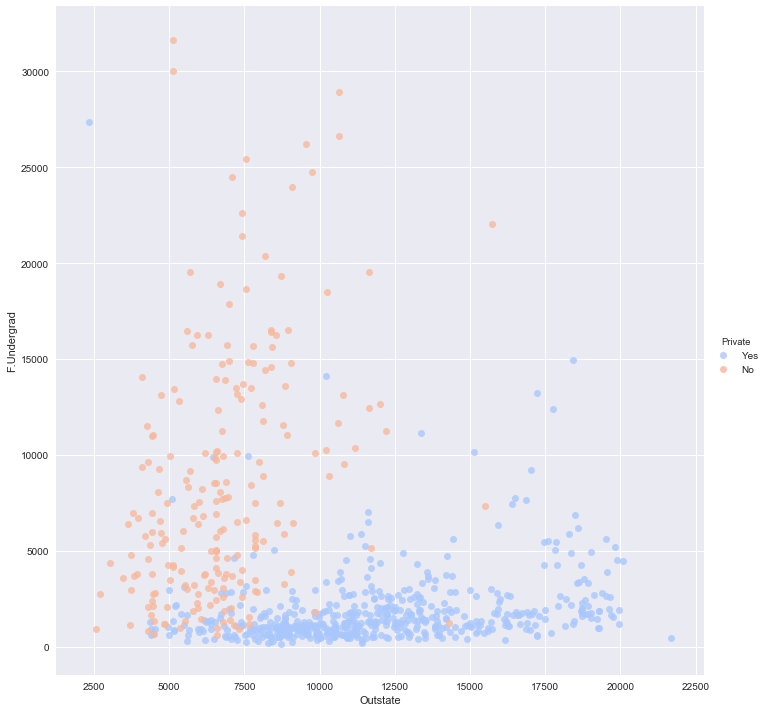

In [58]:
sns.lmplot(data=df, x='Outstate', y='F.Undergrad', hue='Private', palette='coolwarm', size=10, fit_reg=False)

At private universities It seems that there is much less correlation between the numbers of out of state attendees and the proprtion of students that are undergraduates.<br>

It seems that at private universities, student numbers (undergrads are generally smaller). Private universities may have an ability to pull in out of state by their reputation (or exclusivity?) rather than size.  Alternatively perhaps private universities in the US are much more focused on post grad education compared to public universities. 

It's not completely clear (going back to the source material) what Outstate actually means.  We have interpreted it simply as student numbers who are at university outside of their 'home' state.

An alternative representation of the Outstate data may help.  Let's look at a histogram of this feature...

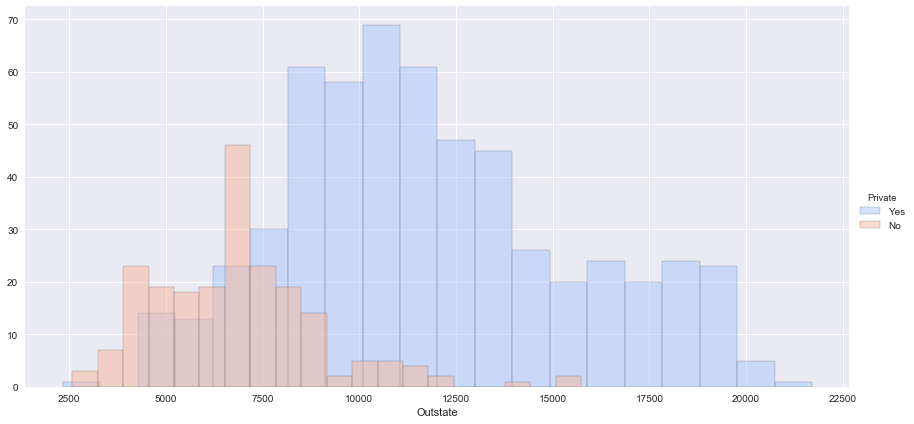

In [59]:
sns.set_style('darkgrid')

# Set up FacetGrid object. We will use it to 'receive' matplotlib histograms.
fg = sns.FacetGrid(df, hue='Private', palette='coolwarm', size=6, aspect=2)

# Map matplotlib histogram to FacetGrid
fg.map(plt.hist, 'Outstate', bins=20, alpha=0.5, edgecolor='black')

fg.add_legend()

# An alternative here is to plot directly from pandas using pd.plot(kind='hist') 
# ...and overlaying 2 plots with adjusted alphas

Clearly the Outstate means here are different with private unversities tending to have higher Outstate values so this feature may aid in separating the two classes.  
We would not expect universities with Outstate > 17500 to be classed as Public.

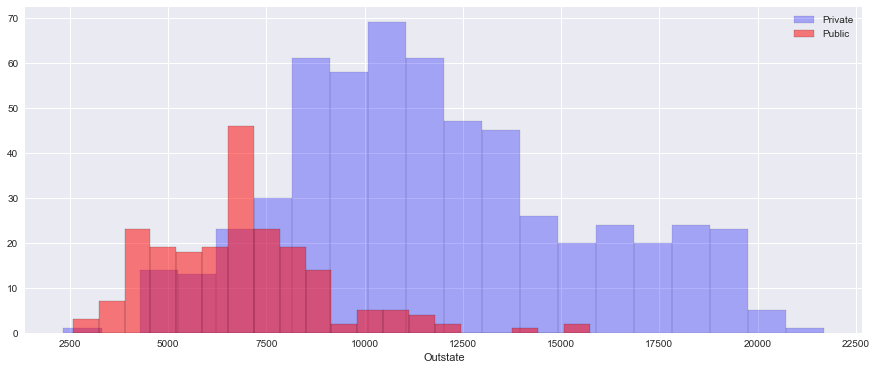

In [60]:
# For reference... use of pandas to create this plot rather than Seaborn

plt.figure(figsize=(15,6))
df[df.Private=='Yes'].Outstate.hist(bins=20, color='blue', alpha=0.3, edgecolor='black', label='Private')
df[df.Private=='No'].Outstate.hist(bins=20,color='red', alpha=0.5, edgecolor='black', label='Public')
plt.xlabel('Outstate')
plt.legend()                                  

Can we use a similar visualisation to reassess if Grad.Rate is of any value inseparating the two classes...

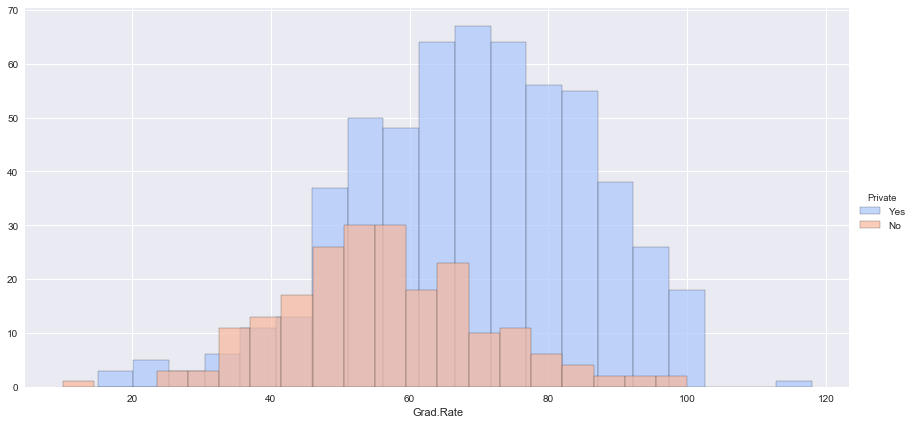

In [61]:
g = sns.FacetGrid(data=df, hue='Private', size=6, aspect=2, palette='coolwarm')
g = g.map(plt.hist, 'Grad.Rate', bins =20, edgecolor='black', alpha=0.7)
g.add_legend()

From the above plot, Grad.Rate does not look like it is of value in separating the public and private universities.

The plot does highlight an unusual datapoint that seems to indicate Grad.Rate > 100%.  We should look at this...

In [62]:
df[df['Grad.Rate']>100] # filter df using feature and value

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Indeed, Cazenovia College is showing graduation rate greater than 100%.  It's hard to know what to do with this.  In the absence of further info, we will set this value to 100...

In [63]:
df['Grad.Rate'].loc['Cazenovia College']

118

In [64]:
df['Grad.Rate'].loc['Cazenovia College']=100

/home/fluff/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [65]:
df['Grad.Rate'].loc['Cazenovia College'] # Given warning, check value has changed

100

## 4) Create K means clustering model

In [66]:
from sklearn.cluster import KMeans

In [67]:
km_model = KMeans(n_clusters=2) # Note num clusters required at object creation rather than when fitting

Fit model to all data except for the _Private_ label

In [68]:
km_model.fit(df.drop('Private', axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Each of the two clusters will have a centre with coordinates in 17 dimensional feature space...

In [69]:
km_model.cluster_centers_ # Same number dimensions as features in data setl

array([[  1.81323468e+03,   1.28716592e+03,   4.91044843e+02,
          2.53094170e+01,   5.34708520e+01,   2.18854858e+03,
          5.95458894e+02,   1.03957085e+04,   4.31136472e+03,
          5.41982063e+02,   1.28033632e+03,   7.04424514e+01,
          7.78251121e+01,   1.40997010e+01,   2.31748879e+01,
          8.93204634e+03,   6.50926756e+01],
       [  1.03631389e+04,   6.55089815e+03,   2.56972222e+03,
          4.14907407e+01,   7.02037037e+01,   1.30619352e+04,
          2.46486111e+03,   1.07191759e+04,   4.64347222e+03,
          5.95212963e+02,   1.71420370e+03,   8.63981481e+01,
          9.13333333e+01,   1.40277778e+01,   2.00740741e+01,
          1.41705000e+04,   6.75925926e+01]])

## 5) Evaluate K means clustering model

Typically clustering is unsupervised.  Here we have the luxury of having labels so we can asses the model's performance directly. 
Note that we are not assessing whether the correct label (1 or 0) has been allocated.  Rather, we want to know that the algorithm has separated the differing examples into 2 groups in the same way that our binary class (_Private_) splits the same examples.

To put this another way...we are not assessing performance based on classification.  We are looking at clustering

In [70]:
# Create a column in dataframe (called U_type) of booleans for when Private is True 
df['U_type']= (df.Private=='Yes') 
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,U_type
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,True
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,True
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,True


In [71]:
# Use lambda to cast bools to ints
df.U_type = df.U_type.apply(lambda x: int(x)) # Private = 1

In [72]:
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,U_type
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1


In [73]:
len(df.U_type) 

777

In [74]:
sum(df.U_type) # Number of examples with U_type = 1

565

In [75]:
len(df.U_type) - sum(df.U_type) # Number of examples with U_type = 1

212

There are 212 Public universities.  There are 565 Private universities. Private is by far the larger group

The U_type divides our examples into 2 categories. The clusters divide our data into 2 groups.

Our assignment of U_type = 1 to Private and 0 to Public is arbitrary.  We could have easily assigned these the other way round. 

Regardless of assigned labels, in order to now assess our clustering model, we should be comparing the largest U_type category (Private) with the largest cluster. 

Let's look at our model clusters to see which is the largest...

In [76]:
len(km_model.labels_) # Number of examples

777

In [77]:
sum(km_model.labels_) # Number of examples allocated to cluster 1

108

In [78]:
len(km_model.labels_)-sum(km_model.labels_) # Number of examples allocated to cluster 0

669

The largest of the two clusters in our model has been assigned value of 0 (669 of 777 examples in this cluster)

We need to assess the performance of the model when we are comparing largest cluster with largest category (i.e. private, which has U_type value = 1).

Let's swap our assignment of 0s and 1 labels for U_type category and calculate metrics based on the renamed labels. 

In [79]:
df.U_type.head()

Abilene Christian University    1
Adelphi University              1
Adrian College                  1
Agnes Scott College             1
Alaska Pacific University       1
Name: U_type, dtype: int64

In [80]:
df.U_type.tail(15)

William Woods University           1
Williams College                   1
Wilson College                     1
Wingate College                    1
Winona State University            0
Winthrop University                0
Wisconsin Lutheran College         1
Wittenberg University              1
Wofford College                    1
Worcester Polytechnic Institute    1
Worcester State College            0
Xavier University                  1
Xavier University of Louisiana     1
Yale University                    1
York College of Pennsylvania       1
Name: U_type, dtype: int64

In [81]:
df.U_type = df.U_type.apply(lambda x : (x+1)%2)

In [82]:
df.U_type.tail(15)

William Woods University           0
Williams College                   0
Wilson College                     0
Wingate College                    0
Winona State University            1
Winthrop University                1
Wisconsin Lutheran College         0
Wittenberg University              0
Wofford College                    0
Worcester Polytechnic Institute    0
Worcester State College            1
Xavier University                  0
Xavier University of Louisiana     0
Yale University                    0
York College of Pennsylvania       0
Name: U_type, dtype: int64

U_type labels are now: <br>
Private = 0<br>
Public  = 1

Let's now compare cluster assignment vs U_type category label to see if our clusters have separated data in a way that corresponds to U_type 

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

In [84]:
print(confusion_matrix(df.U_type, km_model.labels_))  

[[531  34]
 [138  74]]


From confusion matrix:<br>
- There are 531 + 34 = 565 actual class 0 (Private),
- There are 138 + 74 = 212 actual class 1 (Public).
<br>

How does the clustering correspond to our two categories of university:
- K means has assigned 531 private universities to cluster 0 but also included 138 public,
- K means has assigned 74 public universities to cluster 1 but also included 34 private.

Generally, it does seem that the clustering has separated universities in a way that to some extent reflects their private vs public status. 

In [85]:
print(classification_report(df.U_type, km_model.labels_))  

             precision    recall  f1-score   support

          0       0.79      0.94      0.86       565
          1       0.69      0.35      0.46       212

avg / total       0.76      0.78      0.75       777



We should be cautious of using these metrics and associated terminology to evaluate what is an unsupervised algorithm for clustering.  That said...<br>

The clustering model does a good job of finding class 0 (private universities), grouping 531 out of the 565 private universities in cluster 0, giving recall = 0.94.  The quality is lower at 0.79 since the clustering has also pulled in 138 public universities.<br>
<br>
The model is less effective at finding universities that correspond to the public class, grouping 74 out of the 212 (recall = 0.35) into cluster 1.  The quality of the recall is mediocre - 34 class 0 (private) have also been included in cluster 1.  